In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7733 - loss: 0.6792 - val_accuracy: 0.9632 - val_loss: 0.1204
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9655 - loss: 0.1138 - val_accuracy: 0.9730 - val_loss: 0.0808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9776 - loss: 0.0749 - val_accuracy: 0.9785 - val_loss: 0.0756
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9828 - loss: 0.0557 - val_accuracy: 0.9795 - val_loss: 0.0668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 38ms/step - accuracy: 0.9852 - loss: 0.0484 - val_accuracy: 0.9824 - val_loss: 0.0593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9885 - loss: 0.0374 - val_accuracy: 0.9854 - val_loss: 0.0479
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 0.9863 - val_loss: 0.0481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9915 -

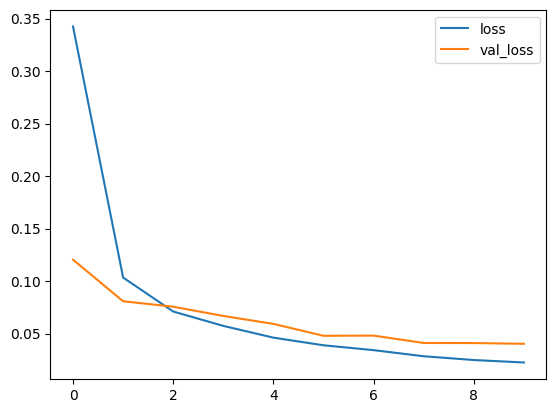

In [6]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

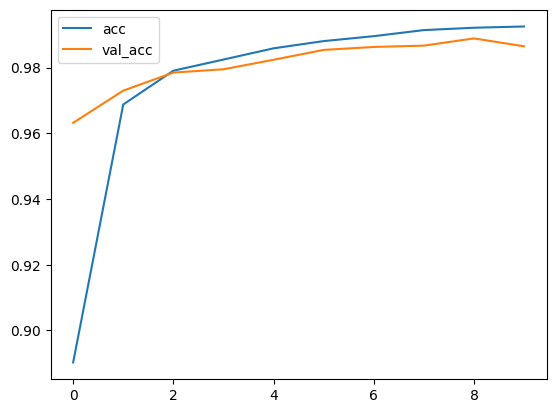

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion matrix, without normalization
[[ 973    0    0    0    0    1    4    1    1    0]
 [   1 1131    1    0    0    0    1    1    0    0]
 [   1    0 1023    0    2    0    1    2    2    1]
 [   0    0    9  992    0    6    0    1    0    2]
 [   0    0    0    0  959    0    3    8    1   11]
 [   3    1    2    2    0  878    2    1    2    1]
 [   3    2    0    1    0    5  942    0    4    1]
 [   1    4    7    0    0    0    0 1012    0    4]
 [   0    1    1    1    1    4    2    2  960    2]
 [   0    0    0    1    3    5    1    2    2  995]]


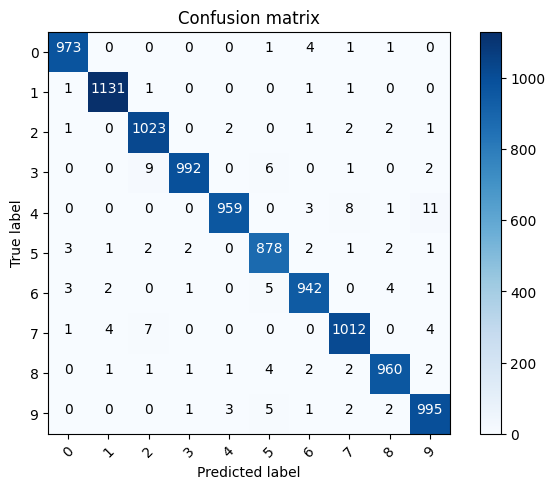

In [8]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

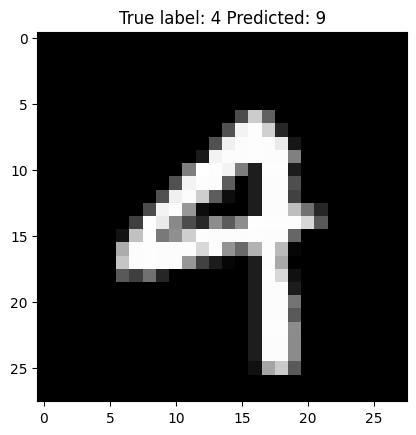

In [9]:
# Pokaż kilka błędnie sklasyfikowanych przykładów
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));